In [1]:
# このコードは変更しない
!pip install -U ccml2021
# You must restart the runtimeとメッセージが出たら、ランタイムを再起動する

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.3 MB/s eta 0:00:00


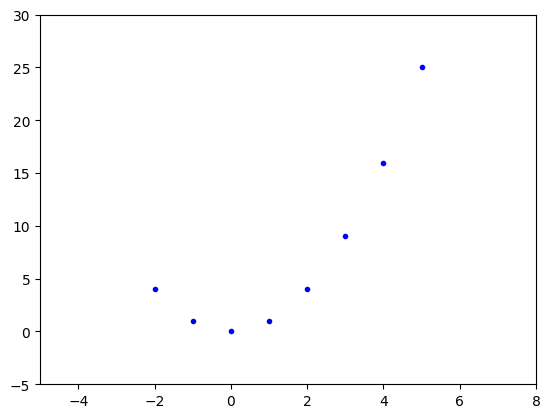

In [5]:
import numpy as np

def f(x):
    return x**2

X_train = np.arange(-2, 5.1, 1).reshape(-1, 1)
Y_train = f(X_train)

X_test = np.arange(-5, 8.1, 0.1).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
scaler_X.fit(X_train)
scaler_Y.fit(Y_train)

X_train_scaled = scaler_X.transform(X_train)
Y_train_scaled = scaler_Y.transform(Y_train)
X_test_scaled = scaler_X.transform(X_test)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, Y_train, 'b.')
ax.set_xlim([-5, 8])
ax.set_ylim([-5, 30])
fig.savefig("regression_sample.png")
plt.show()

In [7]:
from sklearn.cross_decomposition import PLSRegression

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train_scaled, Y_train_scaled.flatten())

y_test_pred_scaled = pls_model.predict(X_test_scaled)

y_test_pred_scaled = y_test_pred_scaled.reshape(-1, 1) 

y_test_pred = scaler_Y.inverse_transform(y_test_pred_scaled)

pls_model.coef_

array([[0.83205029]])

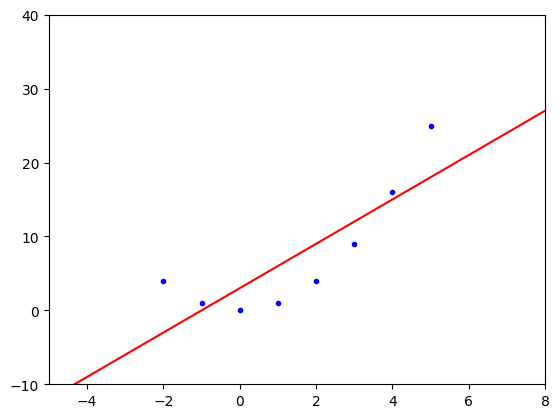

In [14]:
from sklearn.model_selection import GridSearchCV

pls_model_grid = GridSearchCV(
    PLSRegression(),
    param_grid={
        'n_components': [ii+1 for ii in range(X_train.shape[1])],
    },
    cv=3,
)


pls_model_grid.fit(X_train_scaled, Y_train_scaled.flatten())

y_test_pred_scaled = pls_model_grid.predict(X_test_scaled)
y_test_pred_scaled = y_test_pred_scaled.reshape(-1, 1)

y_test_pred_grid = scaler_Y.inverse_transform(y_test_pred_scaled)

pls_model_grid.best_estimator_.coef_

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, Y_train, 'b.')
ax.plot(X_test, y_test_pred_grid, 'r-')
ax.set_xlim([-5, 8])
ax.set_ylim([-10, 40])
fig.savefig("PLS.png")
plt.show()

In [17]:
from sklearn.svm import SVR

svr_model_grid = GridSearchCV(
    SVR(),
    param_grid={
        'gamma': [2**ii for ii in range(-5, 5)],
        'C': [2**ii for ii in range(-5, 5)],
        'epsilon': [2**ii for ii in range(-5, 5)],
    },
    cv=3,
)

svr_model_grid.fit(X_train_scaled, Y_train_scaled.flatten())

y_test_pred_scaled = svr_model_grid.predict(X_test_scaled)
y_test_pred_scaled = y_test_pred_scaled.reshape(-1, 1)

y_test_pred_grid = scaler_Y.inverse_transform(y_test_pred_scaled)
svr_model_grid.best_estimator_.get_params()

{'C': 16,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.03125,
 'gamma': 0.125,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

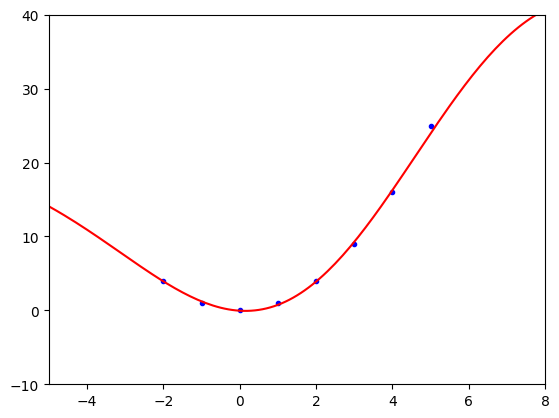

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, Y_train, 'b.')
ax.plot(X_test, y_test_pred_grid, 'r-')
ax.set_xlim([-5, 8])
ax.set_ylim([-10, 40])
fig.savefig("SVR.png")
plt.show()

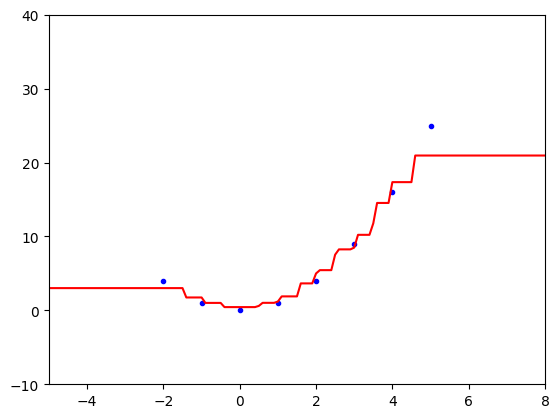

In [22]:
# Random Forestによる回帰分析
from sklearn.ensemble import RandomForestRegressor

rm_model500 = RandomForestRegressor(n_estimators=500)
rm_model500.fit(X_train_scaled, Y_train_scaled.flatten())

y_test_pred_rf_scaled = rm_model500.predict(X_test_scaled)
y_test_pred_rf_scaled = y_test_pred_rf_scaled.reshape(-1, 1)
y_test_pred_rf500 = scaler_Y.inverse_transform(y_test_pred_rf_scaled)

rm_model500.feature_importances_

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, Y_train, 'b.')
ax.plot(X_test, y_test_pred_rf500, 'r-')
ax.set_xlim([-5, 8])
ax.set_ylim([-10, 40])
fig.savefig("RF.png")
plt.show()

## 考察記入欄

PLSを用いた回帰モデルの結果は、線形構造を前提とした解析であるため、データにフィットしていない一方、SVRやRandom Forestは非線形であるデータに対してフィットしている。特にRandom Forestはノイズの多いデータに対しても比較的強靱で、ハイパーパラメータのチューニングにも幅があるため、汎用性の高いモデルである。

## 感想記入欄

PLSは説明変数と目的変数の間に強い相関関係がある場合に有効で、スペクトルデータや多変量データを扱う場合に有効だと思いました。Random Forestは非線形やノイズに強い特性を持つため、患者データからの病気の診断や、顧客の購買行動の要因分析などに使えると思いました。

## 変数名、ファイル名の最終チェック

以下のコードは変更しないでください。

実行することで、上のコードが想定通りの変数名、ファイル名を使用しているかをチェックできます。

In [ ]:
from ccml2021.checker import basic3_1

basic3_1(globals())